## Extensão Universitária Aplicada 1 º Semestre 2024
#### Tema: Sustentabilidade 360º

* Líder: Eneias Nunes
O programa "Sustentabilidade 360° " é uma iniciativa abrangente e
inovadora voltada para a promoção de práticas sustentáveis em diversos
âmbitos. Desenvolvido como um projeto de extensão, tem como objetivo
principal disseminar conhecimentos e estimular a adoção de
comportamentos sustentáveis em comunidades locais. A abordagem
"360°¨reflete a abrangência do programa, que busca integrar aspectos
ambientais, sociais e econômicos para criar soluções holísticas.

#### Projeto: Lixeira Inteligente(EcoTrash)


In [10]:
import os
os.remove("ecotrash_document.db") if os.path.exists("ecotrash_document.db") else None

Conectado a COM11 com 9600 baud.


C:\Users\Roberto\AppData\Local\Temp\ipykernel_20640\1825610874.py:104: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  ani = FuncAnimation(fig, update_bar_chart, frames=None, interval=100)


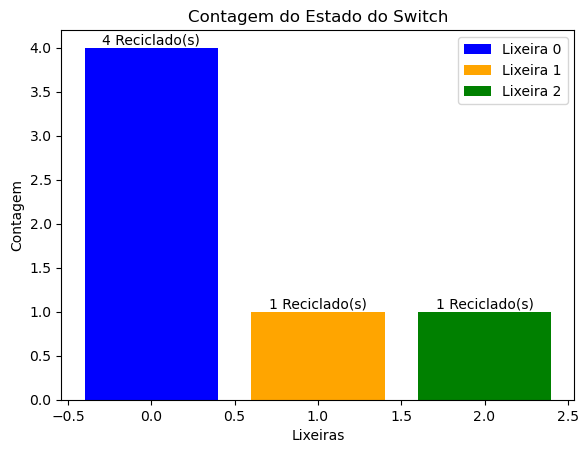

In [11]:
import sqlite3
import serial
import tkinter as tk
from tkinter import ttk
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.animation import FuncAnimation

# Configurações da porta serial
port = 'COM11'
baud_rate = 9600

# Inicializa a lista para armazenar os dados do gráfico
data = {'0': 0, '1': 0, '2': 0}  # Contagem para cada lixeira
cores = {'0': 'blue', '1': 'orange', '2': 'green'}  # Cores para cada lixeira
contagem_pressionado = {'0': 0, '1': 0, '2': 0}  # Contagem de vezes que cada lixeira foi pressionada
estado_anterior = {'0': None, '1': None, '2': None}  # Estado anterior de cada lixeira

# Função para inicializar o gráfico de barras
def init_bar_chart():
    fig, ax = plt.subplots()
    ax.set_title('Contagem do Estado do Switch')
    ax.set_ylabel('Contagem')
    ax.set_xlabel('Lixeiras')
    return fig, ax

# Função para atualizar o gráfico com os dados mais recentes
def update_bar_chart(frame):
    line = ser.readline().decode('utf-8').strip()
    if line:
        estado, lixeira = line.split()[-2:]  # Obtém o estado e o número da lixeira
        lixeira = lixeira.strip()
        if estado != estado_anterior[lixeira]:  # Verifica mudança de estado
            estado_anterior[lixeira] = estado
            if estado == 'fimdecurso_desligado':
                if data[lixeira] < 50:
                    data[lixeira] += 1
                    contagem_pressionado[lixeira] += 1  # Incrementa a contagem de vezes que a lixeira foi pressionada
                    # Atualiza o gráfico de barras
                    update_bar()  
                    # Insere os dados na tabela do banco de dados
                    insert_into_db(contagem_pressionado)

# Função para inserir os dados na tabela do banco de dados
def insert_into_db(contagem_pressionado):
    conn = sqlite3.connect('ecotrash_document.db')
    cursor = conn.cursor()
    cursor.execute('''INSERT INTO coleta (lixeira0, lixeira1, lixeira2)
                      VALUES (?, ?, ?)''', (contagem_pressionado['0'], contagem_pressionado['1'], contagem_pressionado['2']))
    conn.commit()
    conn.close()

# Função para atualizar o gráfico de barras
def update_bar():
    ax.clear()
    for i, (lixeira, contagem) in enumerate(data.items()):
        ax.bar(i, contagem, color=cores[lixeira], label=f'Lixeira {lixeira}')
        ax.text(i, contagem, f'{contagem_pressionado[lixeira]} Reciclado(s)', ha='center', va='bottom')
    ax.set_title('Contagem do Estado do Switch')
    ax.set_ylabel('Contagem')
    ax.set_xlabel('Lixeiras')
    ax.legend()
    canvas.draw()

# Tenta abrir a porta serial
try:
    ser = serial.Serial(port, baud_rate, timeout=1)
    print(f'Conectado a {port} com {baud_rate} baud.')
except serial.SerialException as e:
    print(f'Erro ao tentar abrir a porta serial: {e}')
    exit()

# Cria o banco de dados e a tabela se não existirem
conn = sqlite3.connect('ecotrash_document.db')
cursor = conn.cursor()
cursor.execute('''CREATE TABLE IF NOT EXISTS coleta (
                    id INTEGER PRIMARY KEY,
                    lixeira0 INTEGER,
                    lixeira1 INTEGER,
                    lixeira2 INTEGER
                  )''')
conn.commit()
conn.close()

# Inicializa o gráfico de barras
fig, ax = init_bar_chart()

# Cria a janela Tkinter
root = tk.Tk()
root.title("Contagem do Estado do Switch")

# Adiciona a imagem no topo
imagem = tk.PhotoImage(file="logoEcotrash.png")  # Substitua pelo caminho real da sua imagem
label_imagem = tk.Label(root, image=imagem)
label_imagem.image = imagem  # Mantém uma referência para a imagem para evitar a coleta de lixo
label_imagem.pack(side="top")  # Posiciona a imagem na parte superior da janela

# Adiciona o gráfico à janela Tkinter
canvas = FigureCanvasTkAgg(fig, master=root)
canvas_widget = canvas.get_tk_widget()
canvas_widget.pack(fill=tk.BOTH, expand=True)

# Atualiza o gráfico de barras em intervalos regulares
ani = FuncAnimation(fig, update_bar_chart, frames=None, interval=100)

# Inicia o loop principal da interface gráfica Tkinter
root.mainloop()

# Fecha a porta serial ao fechar a janela
ser.close()


link para visualização de dados no banco de dados:  https://inloop.github.io/sqlite-viewer/